# NYC Taxi Trip Duration Prediction

## Importing libraries

In [1]:
import pandas as pd       #data processing
import numpy as np        #linear algebra

#data visualisation
import seaborn as sns     
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt     

import warnings; warnings.simplefilter('ignore')

## Importing Dataset

In [2]:
data=pd.read_csv("nyc_taxi_trip_duration.csv")

## Exploring the dataset


In [3]:
data.shape

(729322, 11)

In [4]:
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [5]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [6]:
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


In [8]:
data.nunique()

id                    729322
vendor_id                  2
pickup_datetime       709359
dropoff_datetime      709308
passenger_count            9
pickup_longitude       19729
pickup_latitude        39776
dropoff_longitude      27892
dropoff_latitude       53579
store_and_fwd_flag         2
trip_duration           6296
dtype: int64

There are 2 vendors only with vendor id '1' and '2'.

In [9]:
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

## Feature Engineering

In [10]:
data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()

data['pickup_day_no']=data['pickup_datetime'].dt.weekday
data['dropoff_day_no']=data['dropoff_datetime'].dt.weekday

data['pickup_hour']=data['pickup_datetime'].dt.hour
data['dropoff_hour']=data['dropoff_datetime'].dt.hour

data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [11]:
def time_of_day(x):
    if x in range(6,12):
        return 'Morning'
    elif x in range(12,16):
        return 'Afternoon'
    elif x in range(16,22):
        return 'Evening'
    else:
        return 'Late night'


In [12]:
data['pickup_timeofday']=data['pickup_hour'].apply(time_of_day)
data['dropoff_timeofday']=data['dropoff_hour'].apply(time_of_day)

In [13]:
from geopy.distance import great_circle 

In [14]:
def cal_distance(pickup_lat,pickup_long,dropoff_lat,dropoff_long):
    
    start_coordinates=(pickup_lat,pickup_long)
    stop_coordinates=(dropoff_lat,dropoff_long)
    
    return great_circle(start_coordinates,stop_coordinates).km

In [15]:
data['distance'] = data.apply(lambda x: cal_distance(x['pickup_latitude'],x['pickup_longitude'],x['dropoff_latitude'],x['dropoff_longitude'] ), axis=1)

In [16]:
data.drop(columns='id',inplace=True)

# Target Variable

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

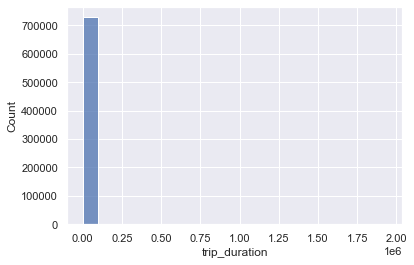

In [17]:
sns.histplot(data['trip_duration'],kde=False,bins=20)

<AxesSubplot:xlabel='trip_duration'>

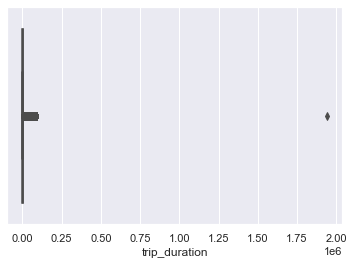

In [18]:
sns.boxplot(data['trip_duration'])

In [19]:
data['trip_duration'].sort_values()

296874          1
323299          1
622664          1
398887          1
312992          1
           ...   
496391      86377
177225      86378
119185      86387
259437      86391
21813     1939736
Name: trip_duration, Length: 729322, dtype: int64

In [20]:
data.drop(data[data['trip_duration'] == 1939736].index, inplace = True) 

In [21]:
data.trip_duration.describe()

count    729321.000000
mean        949.570793
std        3127.522020
min           1.000000
25%         397.000000
50%         663.000000
75%        1075.000000
max       86391.000000
Name: trip_duration, dtype: float64

In [22]:
#data['trip__duration']=np.log(data['trip_duration'])

#sns.displot(data['trip__duration'],kde=False)

# Univariate Data Analysis

## Vendor id

<AxesSubplot:xlabel='vendor_id', ylabel='count'>

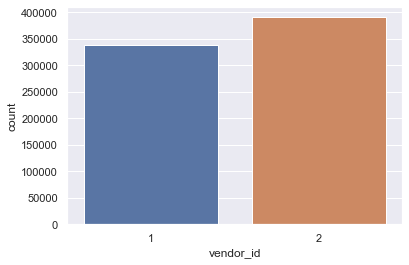

In [23]:
sns.countplot(x='vendor_id',data=data)

We see that there is not much difference between the trips taken by both vendors.

## Passenger Count

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

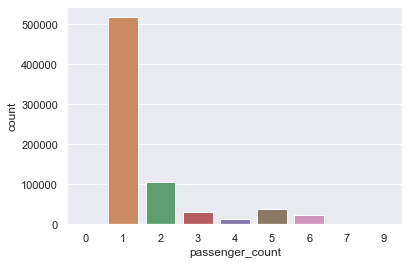

In [24]:
sns.countplot(x='passenger_count',data=data)

We see the highest amount of trips are with 1 passenger.

In [25]:
data.passenger_count.value_counts()

1    517414
2    105097
5     38926
3     29692
6     24107
4     14050
0        33
9         1
7         1
Name: passenger_count, dtype: int64

There are some trips with even 0 passenger count.
There is only 1 trip each for 7 and 9 passengers.

Let us remove the rows which have 0 or 7 or 9 passenger count.

In [26]:
data=data[data['passenger_count']!=0]
data=data[data['passenger_count']<=6]

## Store and Forward Flag

In [27]:
data['store_and_fwd_flag'].value_counts(normalize=True)

N    0.994463
Y    0.005537
Name: store_and_fwd_flag, dtype: float64

## Distance

In [28]:
data['distance'].value_counts()

0.000000     2893
0.000424       21
0.000424       19
0.000424       18
0.001273       13
             ... 
0.626853        1
2.298744        1
11.986954       1
1.458075        1
0.566500        1
Name: distance, Length: 726216, dtype: int64

We see there are 2893 trips with 0 km distance.

The reasons for 0 km distance can be:

- The dropoff location couldn't be tracked.
- The driver delibrately took this ride to complete a target ride number.
- The passengers cancelled the trip

<AxesSubplot:xlabel='distance', ylabel='Count'>

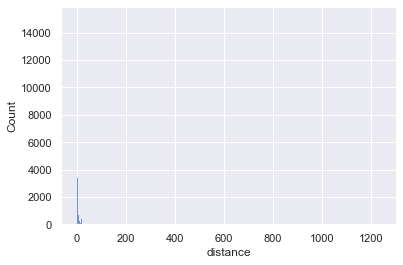

In [29]:
sns.histplot(data['distance'],kde=False)

<AxesSubplot:xlabel='distance'>

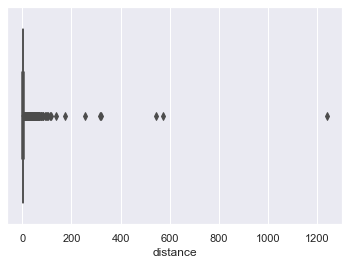

In [30]:
sns.boxplot(data['distance'])

## Trips per Days

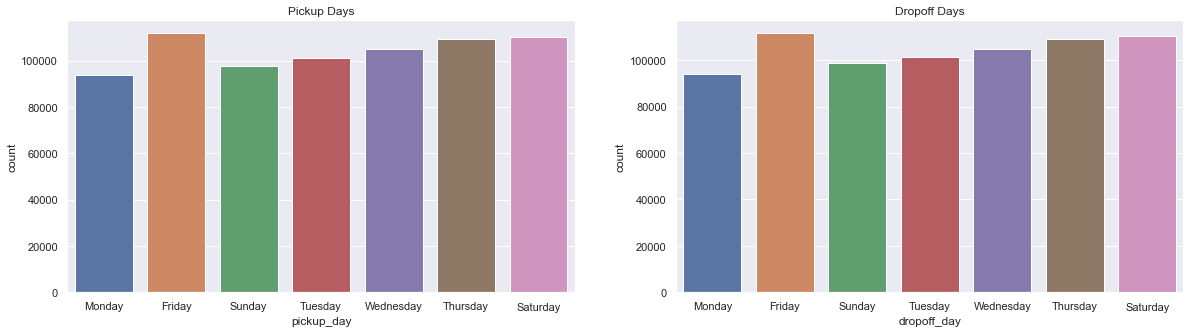

In [31]:
figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))

ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data,ax=ax1)

ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data,ax=ax2)

We see, Fridays are the most busy taxi days followed by Saturday and Thursday.

## Trips per Hour

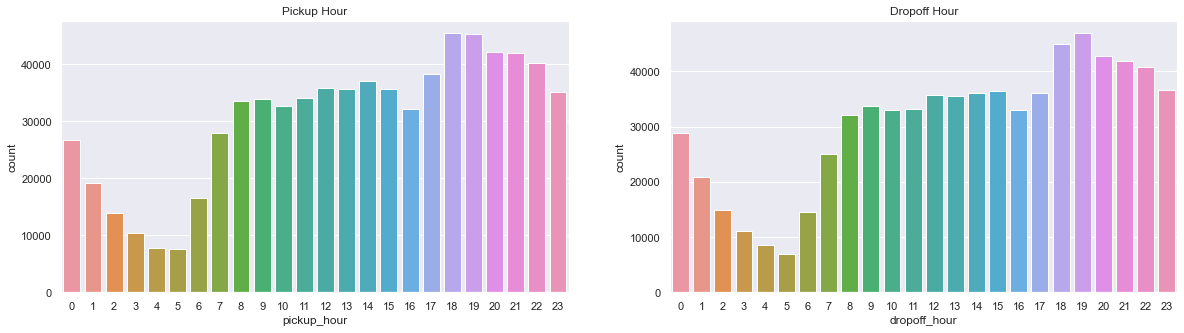

In [32]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))

ax9.set_title('Pickup Hour')
ax=sns.countplot(x="pickup_hour",data=data,ax=ax9)

ax10.set_title('Dropoff Hour')
ax=sns.countplot(x="dropoff_hour",data=data,ax=ax10)

We see the busiest hours are 6:00 pm to 7:00 pm and that makes sense as this is the time when people return from their offices.

## Trips per time of day

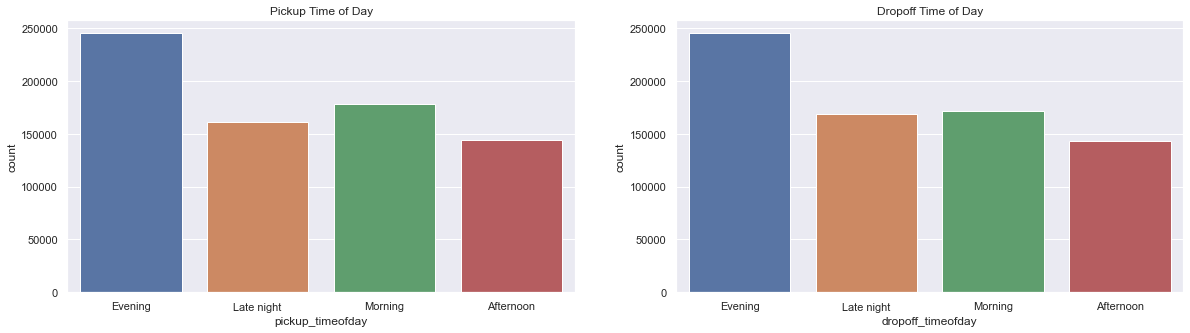

In [33]:
figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))

ax3.set_title('Pickup Time of Day')
ax=sns.countplot(x="pickup_timeofday",data=data,ax=ax3)

ax4.set_title('Dropoff Time of Day')
ax=sns.countplot(x="dropoff_timeofday",data=data,ax=ax4)

As we saw above, evenings are busiest.

## Trips per month

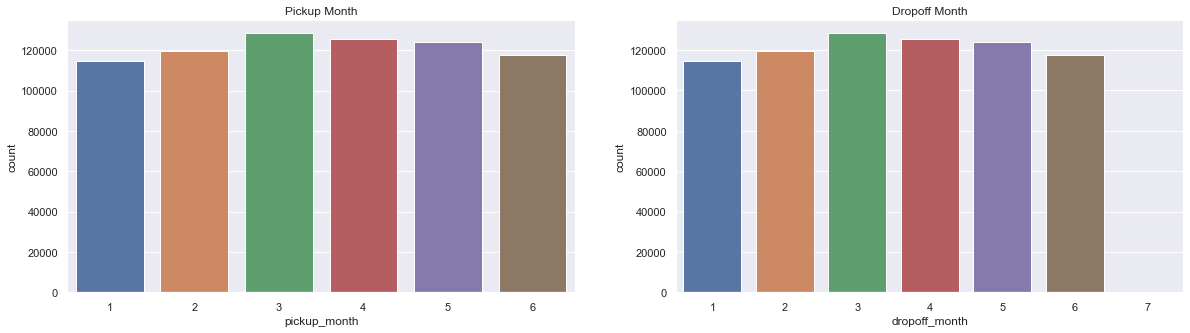

In [34]:
figure,(ax11,ax12)=plt.subplots(ncols=2,figsize=(20,5))

ax11.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data,ax=ax11)

ax12.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data,ax=ax12)

There is not much difference in number of trips across months.

In [35]:
#data['log_distance']=np.log(data['distance']+1)

#sns.displot(data['log_distance'],kde=False)

# Bivariate Analysis

## Trip Duration per vendor id

<AxesSubplot:xlabel='vendor_id', ylabel='trip_duration'>

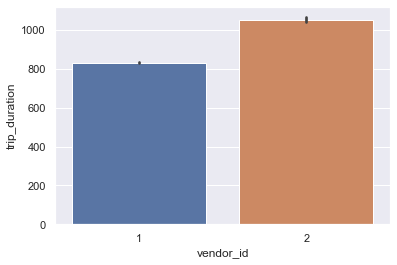

In [36]:
sns.barplot(y='trip_duration',x='vendor_id',data=data,estimator=np.mean)

Vendor id 2 takes longer trips as compared to vendor 1.

## Trip Duration per Store and Forward Flag

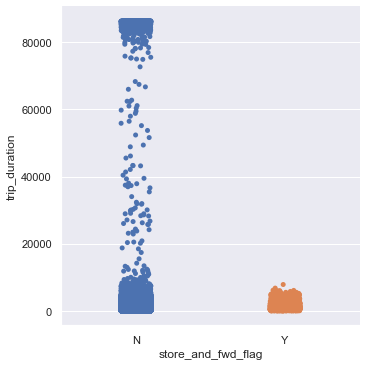

In [37]:
sns.catplot(y='trip_duration',x='store_and_fwd_flag',data=data,kind="strip")

Trip duration is generally longer for trips whose flag was not stored.

## Trip Duration per passenger count

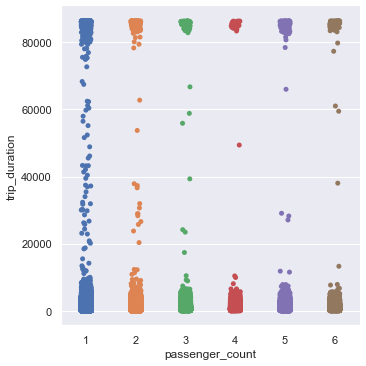

In [38]:
sns.catplot(y='trip_duration',x='passenger_count',data=data,kind="strip")

There is no visible relation between trip duration and passenger count.

## Trip Duration per Hour

<AxesSubplot:xlabel='pickup_hour', ylabel='trip_duration'>

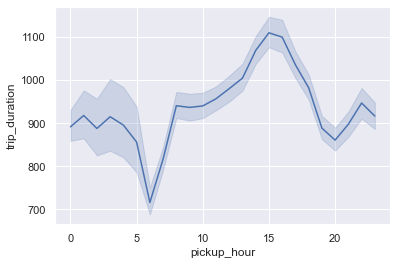

In [39]:
sns.lineplot(x='pickup_hour',y='trip_duration',data=data)

We see trip duration is the maximum around 3 pm which may be because of traffic on the roads. Trip duration is the lowest around 6 am as streets may not be busy. 

## Trip Duration per Time of day

<AxesSubplot:xlabel='pickup_timeofday', ylabel='trip_duration'>

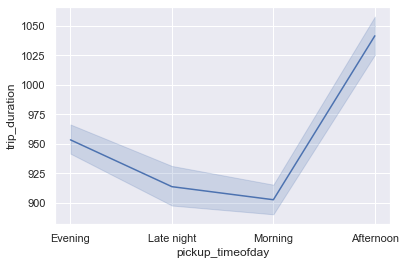

In [40]:
sns.lineplot(x='pickup_timeofday',y='trip_duration',data=data)

As we saw above, trip duration is the maximum in the afternoon and lowest between late night and morning. 

## Trip Duration per Day of Week

<AxesSubplot:xlabel='pickup_day_no', ylabel='trip_duration'>

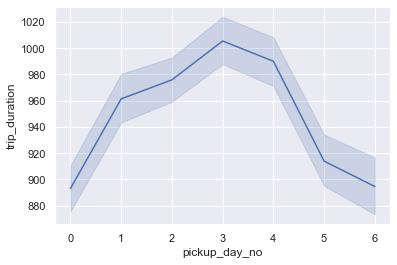

In [41]:
sns.lineplot(x='pickup_day_no',y='trip_duration',data=data)

Trip duration is the longest on Thursdays closely followed by Fridays.

## Trip Duration per Month

<AxesSubplot:xlabel='pickup_month', ylabel='trip_duration'>

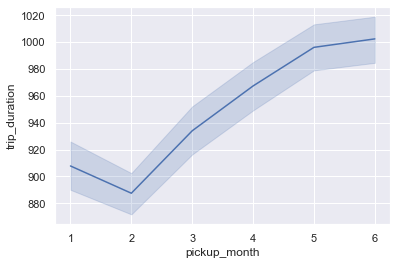

In [42]:
sns.lineplot(x='pickup_month',y='trip_duration',data=data)

From February, we can see trip duration rising every month.

## Distance and Vendor

<AxesSubplot:xlabel='vendor_id', ylabel='distance'>

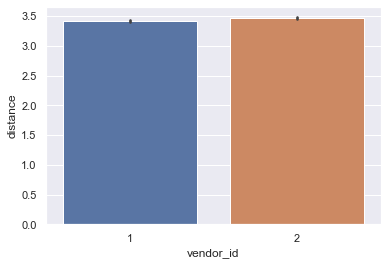

In [43]:
sns.barplot(y='distance',x='vendor_id',data=data,estimator=np.mean)

The distribution for both vendors is very similar.

## Distance and Store and Forward Flag

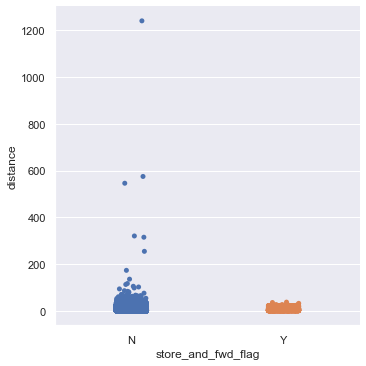

In [44]:
sns.catplot(y='distance',x='store_and_fwd_flag',data=data,kind="strip")

We see for longer distances the trip is not stored.

## Distance per passenger count

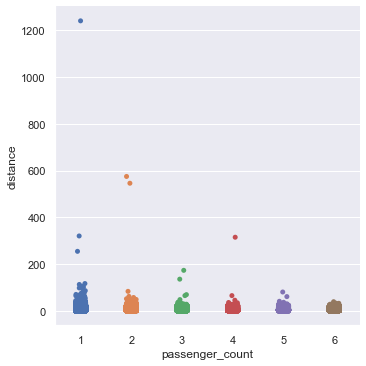

In [45]:
sns.catplot(y='distance',x='passenger_count',data=data,kind="strip")

We see some of the longer distances are covered by either 1 or 2 or 4 passenger rides.

## Distance per Day of Week

<AxesSubplot:xlabel='pickup_day_no', ylabel='distance'>

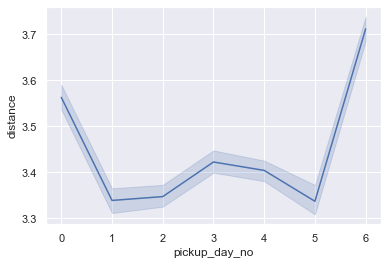

In [46]:
sns.lineplot(x='pickup_day_no',y='distance',data=data)

Distances are longer on Sundays probably because it's weekend. Also, Monday trip distances are also quite high. This probably means that there can be outstation trips on these days and/or the streets are busier.

## Distance per hour of day

<AxesSubplot:xlabel='pickup_hour', ylabel='distance'>

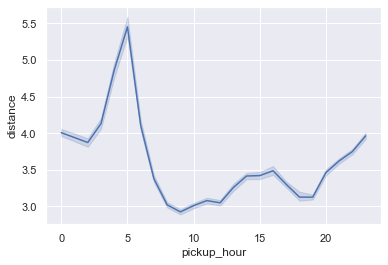

In [47]:
sns.lineplot(x='pickup_hour',y='distance',data=data)

Distances are the longest around 5 am. 

## Distance per time of Day

<AxesSubplot:xlabel='pickup_timeofday', ylabel='distance'>

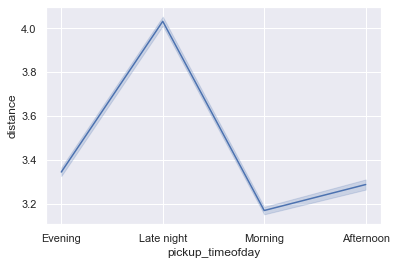

In [48]:
sns.lineplot(x='pickup_timeofday',y='distance',data=data)

As seen above also, distances being the longest during late night or it maybe called as early morning too. This can probably point to outstation trips where people start early for the day.

## Distance per Month

<AxesSubplot:xlabel='pickup_month', ylabel='distance'>

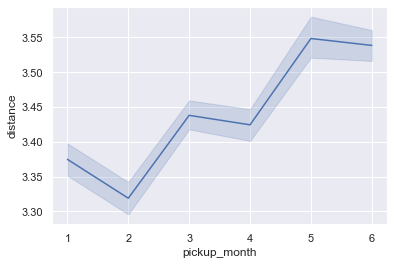

In [49]:
sns.lineplot(x='pickup_month',y='distance',data=data)

As we also saw during trip duration per month, similarly trip distance is the lowest in February and the maximum in June.

## Passenger Count and Vendor id

<AxesSubplot:xlabel='vendor_id', ylabel='passenger_count'>

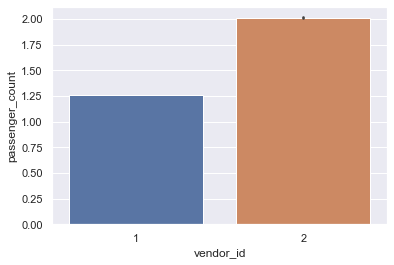

In [50]:
sns.barplot(y='passenger_count',x='vendor_id',data=data)

This shows that vendor 2 generally carries 2 passengers while vendor 1 carries 1 passenger rides.

## Trip Duration and Distance

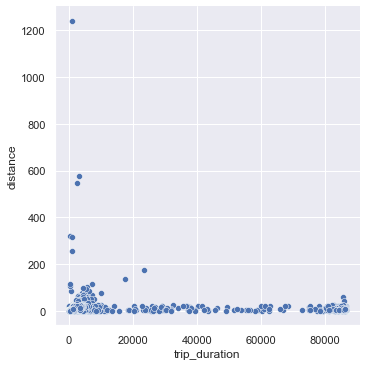

In [51]:
sns.relplot(y=data.distance,x='trip_duration',data=data)

We can see there are trips which trip duration as short as 0 seconds and yet covering a large distance. And, trips with 0 km distance and long trip durations.

Let us see few rows whose distances are 0.

In [52]:
data[data.distance==0].head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
263,2,2016-06-28 11:21:00,2016-06-28 11:25:00,2,-73.996422,40.298828,-73.996422,40.298828,N,240,...,Tuesday,1,1,11,11,6,6,Morning,Morning,0.0
327,2,2016-03-26 13:34:38,2016-03-26 13:37:17,1,-73.996323,40.753460,-73.996323,40.753460,N,159,...,Saturday,5,5,13,13,3,3,Afternoon,Afternoon,0.0
795,2,2016-06-13 16:49:52,2016-06-13 17:04:49,5,-73.967171,40.763500,-73.967171,40.763500,N,897,...,Monday,0,0,16,17,6,6,Evening,Evening,0.0
1176,1,2016-02-29 21:39:52,2016-02-29 21:44:08,1,-73.995232,40.744038,-73.995232,40.744038,N,256,...,Monday,0,0,21,21,2,2,Evening,Evening,0.0
1257,2,2016-03-13 11:38:36,2016-03-13 12:00:46,2,-73.912781,40.804428,-73.912781,40.804428,N,1330,...,Sunday,6,6,11,12,3,3,Morning,Afternoon,0.0


In [53]:
data[data.distance==0].tail()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,...,dropoff_day,pickup_day_no,dropoff_day_no,pickup_hour,dropoff_hour,pickup_month,dropoff_month,pickup_timeofday,dropoff_timeofday,distance
728720,2,2016-05-05 21:32:43,2016-05-05 21:32:57,2,-73.977898,40.766392,-73.977898,40.766392,N,14,...,Thursday,3,3,21,21,5,5,Evening,Evening,0.0
728775,2,2016-03-13 20:06:40,2016-03-13 20:14:24,1,-73.974258,40.759895,-73.974258,40.759895,N,464,...,Sunday,6,6,20,20,3,3,Evening,Evening,0.0
728838,2,2016-05-29 04:04:32,2016-05-29 04:11:33,2,-73.984558,40.750839,-73.984558,40.750839,N,421,...,Sunday,6,6,4,4,5,5,Late night,Late night,0.0
729025,2,2016-04-06 18:03:34,2016-04-06 18:26:23,1,-74.083611,40.632401,-74.083611,40.632401,N,1369,...,Wednesday,2,2,18,18,4,4,Evening,Evening,0.0
729308,2,2016-01-20 08:22:38,2016-01-20 08:47:35,1,-73.977859,40.749538,-73.977859,40.749538,N,1497,...,Wednesday,2,2,8,8,1,1,Morning,Morning,0.0


We can see even though distance is recorded as 0 but trip duration is definitely more.
- One reason can be that the dropoff coordinates weren't recorded.
- Other reason one can think is that for short trip durations, maybe the passenger changed their mind and cancelled the ride after some time.

In [54]:
data['log_distance']=np.log(data['distance']+1)

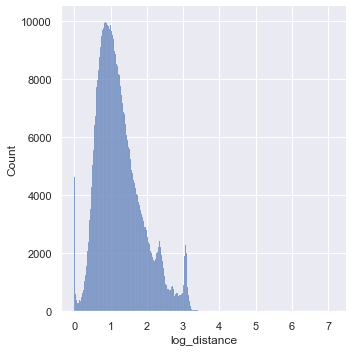

In [55]:
sns.displot(data['log_distance'],kde=False)

In [56]:
data['log_duration']=np.log(data['trip_duration']+1)

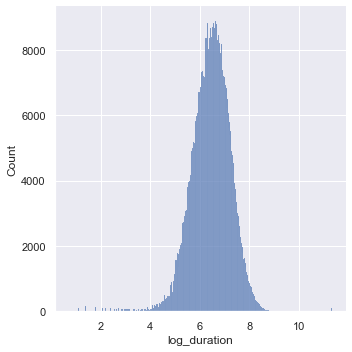

In [57]:
sns.displot(data['log_duration'],kde=False)

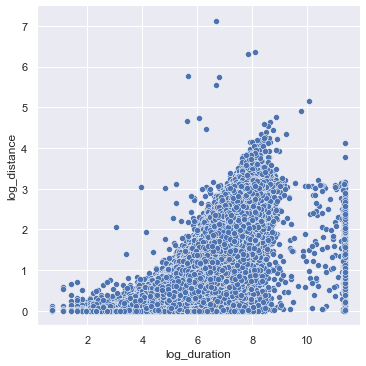

In [58]:
sns.relplot(y=data.log_distance,x=data.log_duration,data=data)

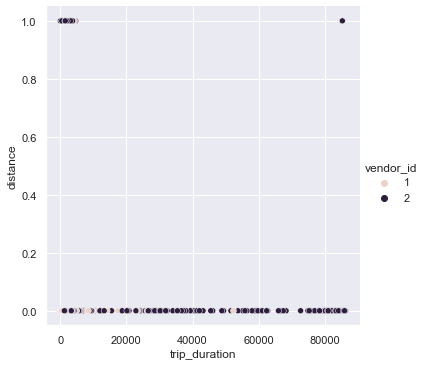

In [59]:
sns.relplot(y=data.distance==0,x='trip_duration',data=data,hue='vendor_id')

## Feature Engineering

In [54]:
data['vendor_id']=data['vendor_id']-1

In [55]:
data=data[data['trip_duration']!=0]

In [56]:
#data['log_distance']=data['log_distance'].replace(0,data['log_distance'].mean())

In [57]:
data.columns

Index(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration', 'pickup_day',
       'dropoff_day', 'pickup_day_no', 'dropoff_day_no', 'pickup_hour',
       'dropoff_hour', 'pickup_month', 'dropoff_month', 'pickup_timeofday',
       'dropoff_timeofday', 'distance'],
      dtype='object')

## Preparing Data for Model Building

In [58]:
data.drop(['pickup_datetime', 'dropoff_datetime','store_and_fwd_flag','pickup_day', 'dropoff_day'],axis=1,inplace=True)

In [60]:
data=pd.get_dummies(data,columns=['pickup_timeofday', 'dropoff_timeofday'])

In [61]:
data.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,pickup_day_no,dropoff_day_no,pickup_hour,...,dropoff_month,distance,pickup_timeofday_Afternoon,pickup_timeofday_Evening,pickup_timeofday_Late night,pickup_timeofday_Morning,dropoff_timeofday_Afternoon,dropoff_timeofday_Evening,dropoff_timeofday_Late night,dropoff_timeofday_Morning
0,1,1,-73.953918,40.778873,-73.963875,40.771164,400,0,0,16,...,2,1.199074,0,1,0,0,0,1,0,0
1,0,2,-73.988312,40.731743,-73.994751,40.694931,1100,4,4,23,...,3,4.129117,0,0,1,0,0,0,1,0
2,1,2,-73.997314,40.721458,-73.948029,40.774918,1635,6,6,17,...,2,7.250763,0,1,0,0,0,1,0,0
3,1,6,-73.961670,40.759720,-73.956779,40.780628,1141,1,1,9,...,1,2.361101,0,0,0,1,0,0,0,1
4,0,1,-74.017120,40.708469,-73.988182,40.740631,848,2,2,6,...,2,4.328540,0,0,0,1,0,0,0,1


In [62]:
data.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'trip_duration',
       'pickup_day_no', 'dropoff_day_no', 'pickup_hour', 'dropoff_hour',
       'pickup_month', 'dropoff_month', 'distance',
       'pickup_timeofday_Afternoon', 'pickup_timeofday_Evening',
       'pickup_timeofday_Late night', 'pickup_timeofday_Morning',
       'dropoff_timeofday_Afternoon', 'dropoff_timeofday_Evening',
       'dropoff_timeofday_Late night', 'dropoff_timeofday_Morning'],
      dtype='object')

## Feature Scaling

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [65]:
scaler=MinMaxScaler()
scaled_data=scaler.fit_transform(data)

## Defining Metric

In [66]:
from sklearn.metrics import mean_squared_error as mse
from math import sqrt

## Train test split

In [67]:
y=data.trip_duration
X=data.drop('trip_duration',axis=1)

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

# Training Model

## Baseline Model

In [69]:
mean_duration=np.repeat(y_train.mean(),len(y_test))

In [70]:
sqrt(mse(y_test,mean_duration))

3162.6104074831755

## Linear Regression

In [71]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()
lr.fit(X_train,y_train)

lr_pred=lr.predict(X_test)

sqrt(mse(y_test,lr_pred))

3106.155469686885

# Decision Tree

In [73]:
from sklearn.tree import DecisionTreeRegressor

dtree = DecisionTreeRegressor(min_samples_leaf=25, min_samples_split=25)
dtree.fit(X_train, y_train)

dtree_pred=dtree.predict(X_test)

sqrt(mse(y_test,dtree_pred))

3193.656286867048

In [74]:
from sklearn.linear_model import Ridge


ridgeReg = Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

sqrt(mse(y_test,pred))

3119.3708813417425

In [75]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.3, normalize=True)
lassoReg.fit(X_train,y_train)

lasso_pred = lassoReg.predict(X_test)

sqrt(mse(y_test,lasso_pred))

3134.3135565810358